# K-Nearest Neighbors (KNN) 

KNN ek supervised learning algorithm hai jo naye input ka prediction karta hai uske paas ke k data points dekh kar (k = number of neighbors).

>Disease detection

>Customer churn

>Image classification

It works on distance-based similarity (usually Euclidean).

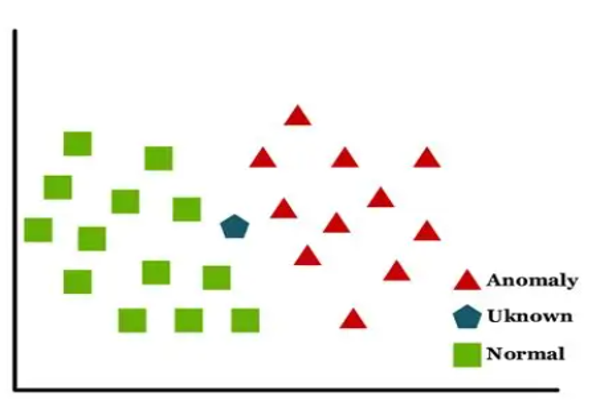

In [1]:
from PIL import Image 
from IPython.display import display
display(Image.open(r"C:\Users\renuk\OneDrive\Pictures\Screenshots\Screenshot 2025-07-08 145719.png").resize((600, 400)))

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Sample dataset
df = pd.read_csv("Data Sample Storage/fitness_subscribe_knn.csv")  # or use manually created df

# Encode categorical
for col in ['Gender', 'Fitness_Level', 'Diet']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df[['Age', 'Gender', 'Fitness_Level', 'Diet']]
y = df['Will_Subscribe']

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.45
Confusion Matrix:
 [[6 5]
 [6 3]]
Report:
               precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.38      0.33      0.35         9

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.44      0.45      0.45        20



In [13]:
# New user: Age 30, Female, Intermediate, Veg
new_user = pd.DataFrame([[30, 0, 1, 0]], columns=['Age', 'Gender', 'Fitness_Level', 'Diet'])

prediction = knn.predict(new_user)
print("Will Subscribe?" , "Yes" if prediction[0] == 1 else "No")

Will Subscribe? No


#  Homework Suggestion (Based on Today’s Class):
# ✅ Practice predictions using different k values
# ✅ Plot accuracy vs k
# ✅ Add new users and test
# ✅ Predict if user will subscribe or not

